# Fashion MNIST

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maheshcregmi","key":"f213ec6998e14b9bfc2efaf01a15d204"}'}

In [0]:
!kaggle datasets download -d zalando-research/fashionmnist

 67% 46.0M/68.8M [00:00<00:00, 65.6MB/s]
100% 68.8M/68.8M [00:00<00:00, 101MB/s] 


In [0]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [17]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
!rm -rf train/*

In [0]:

for i in np.unique(train['label']):
  (Path("train")/str(i)).mkdir()

In [0]:

from PIL import Image as Im
trainPath = Path("train")
testPath = Path("test")
for index,row in train.iterrows():
  label, img = row[0] , row[1:]
  filepath = trainPath / str(label)
  fileName = str(index) + ".jpg"
  final_image = img.values.reshape(28,28).astype(np.uint8)
  image = Im.fromarray(final_image)
  image.save(filepath / fileName)

In [0]:


data = ImageDataBunch.from_folder(".",valid_pct=0.1, ds_tfms=get_transforms(), size=28, bs=64)

In [0]:
cnn = cnn_learner(data,models.resnet34,metrics=accuracy)

In [71]:
cnn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


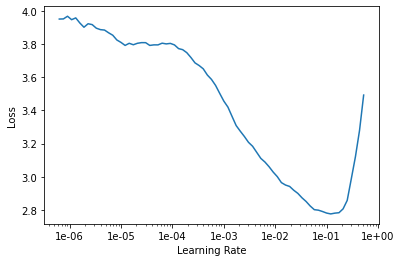

In [72]:
cnn.recorder.plot()

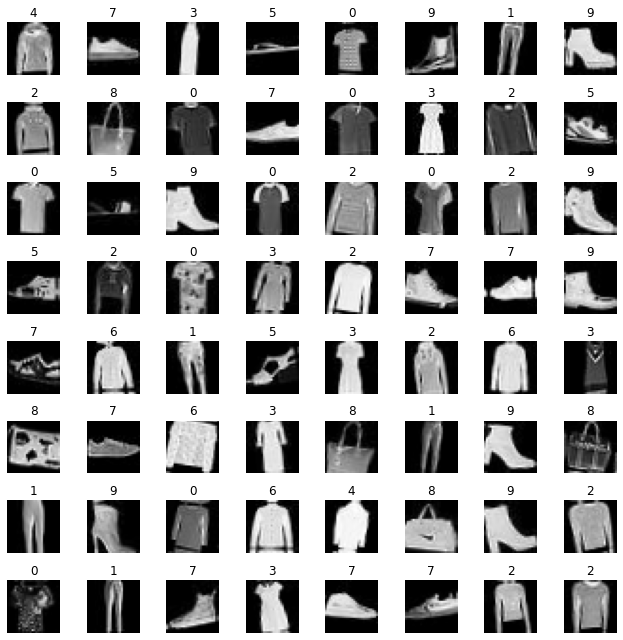

In [73]:
data.show_batch(8, figsize=(9,9))

In [74]:
cnn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.927475,0.951717,0.727500,02:31
1,0.659542,0.699848,0.804333,02:34
2,0.523147,0.500618,0.852833,02:34
3,0.463839,0.410021,0.862000,02:39
4,0.433854,0.391318,0.864833,02:38


In [75]:
cnn.unfreeze()

cnn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


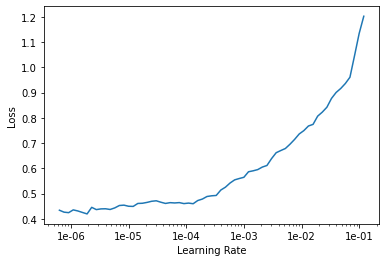

In [76]:
cnn.recorder.plot()

In [77]:
interp = ClassificationInterpretation.from_learner(cnn)

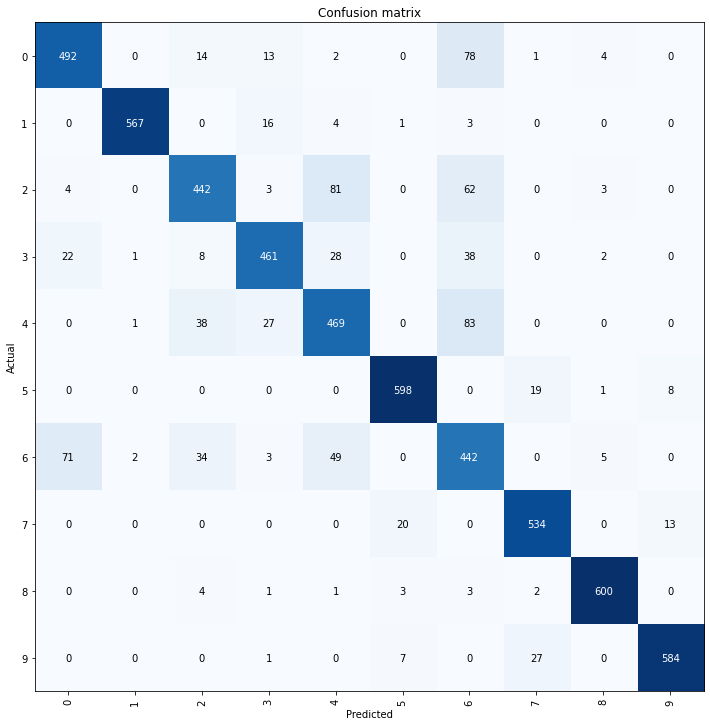

In [81]:
interp.plot_confusion_matrix(figsize=(10,10))

plt.savefig("test.jpg")

In [0]:
cnn.export()

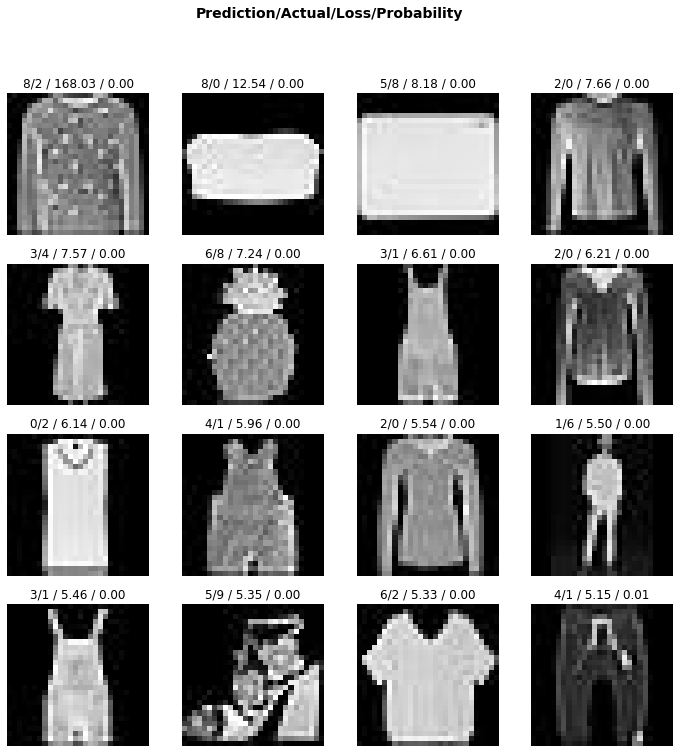

In [86]:
interp.plot_top_losses(16)